# Analyzing the effect of weather on policing
### Analyzing Police Activity with pandas¶
#### Career track : Data Analyts with Python
#### DataCamp - 2020
### Karen Jimenez

<i> Using a second dataset to explore the impact of weather conditions on police behavior during traffic stops. You will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills. <hr>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('data/weather.csv')

## Plotting the temperature

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


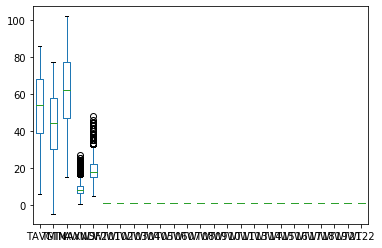

In [2]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather.plot(kind='box')

# Display the plot
plt.show()

## Plotting the temperature difference

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


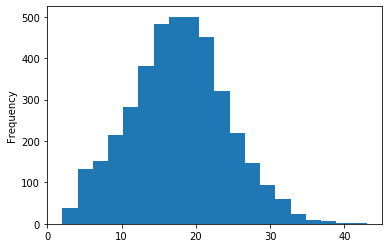

In [3]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

<i> The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.
<hr>

## Counting bad weather conditions

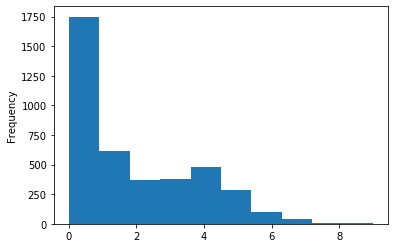

In [4]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

<i> It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.
<hr>

## This rating system should make the weather condition data easier to understand.

In [5]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


## Changing the data type to category

In [7]:

# Create a list of weather ratings in logical order
cats = pd.api.types.CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]
